In [1]:
import pandas 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipotle_data = pandas.read_csv(url, sep = '\t')
chipotle_data.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [3]:
print(chipotle_data.columns.tolist()) # Prints columns names 

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [4]:
items = []
item_counts = chipotle_data['item_name'].value_counts()
most_ordered_item = item_counts.idxmax()
order_count = item_counts[most_ordered_item]
print('Most ordered item is ' + most_ordered_item + " with " + str(order_count))

Most ordered item is Chicken Bowl with 726


In [5]:
cbdata= chipotle_data[chipotle_data['item_name'] == 'Chicken Bowl']
totalrev = 0
for price in cbdata['item_price']:
    pricen = float(price[1:])
    quantity = cbdata['quantity'][cbdata['item_price'] == price].values[0]
    #print(price,quantity)
    totalrev += pricen * quantity
    
print(totalrev)

8044.629999999975


In [6]:
cbdata = len(chipotle_data['order_id'].unique())
cbdata

1834

In [7]:
itemsover10 = 0
for prices in chipotle_data['item_price']:
    if float(prices[1:]) > 10:
        itemsover10 += 1
        
print(itemsover10)

1130


In [8]:
uniqueitems = chipotle_data['item_name'].unique()
uniqueitems

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

Text(0.5, 0, 'Item Name')

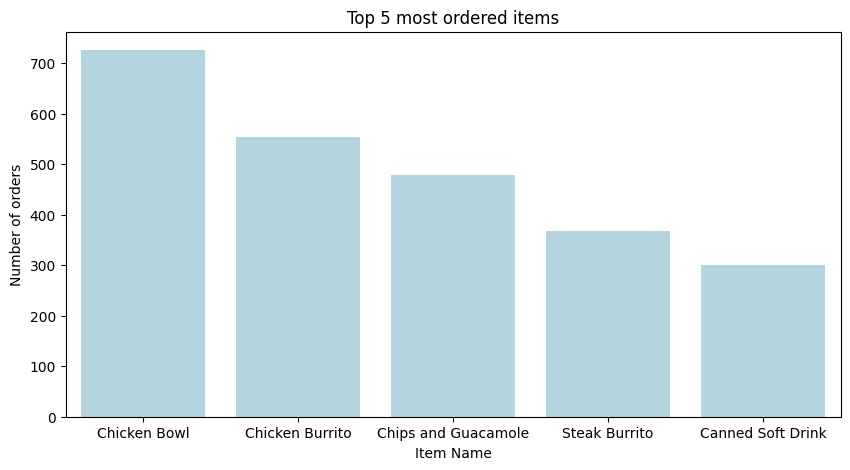

In [9]:
# Create a bar graph of the top 5 items sold.
top5 = item_counts[:5]
plt.figure(figsize=(10, 5))
sns.barplot(x=top5.index, y=top5.values, color='lightblue')
plt.title('Top 5 most ordered items')
plt.ylabel('Number of orders')
plt.xlabel('Item Name')

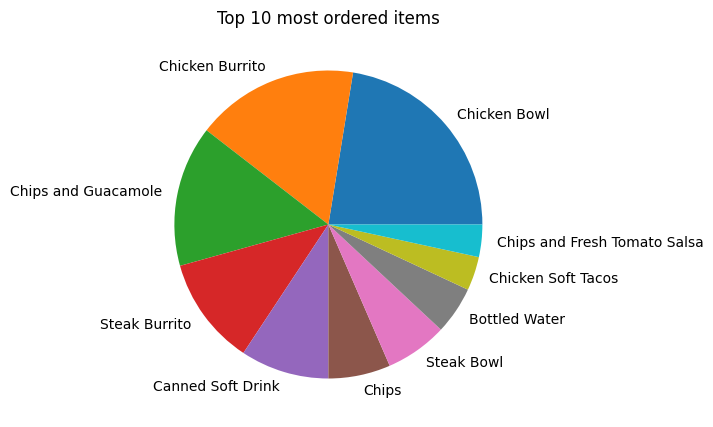

In [10]:
# Create a pie chart showing the number of times each of the top 10 items were ordered.
top10 = item_counts[:10]
plt.figure(figsize=(10, 5))
plt.pie(top10.values, labels=top10.index)
plt.title('Top 10 most ordered items')
plt.show()